<a href="https://colab.research.google.com/github/Kenobi-Knobs/DataScienceSSUCourse/blob/master/Lab%201/lab_1.3_1.4_pandas_titanic_ua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Лабораторна робота № 2.<br> Аналіз даних про пасажирів лайнеру "Титанік"</center>

**В завданні пропонується за допомогою Pandas відповісти на декілька питань за даними репозиторія Kaggle (https://www.kaggle.com/c/titanic/data) (качати дані не потрібно – вони вже є в директорії роботи).**


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

**Зчитати дані з файлу в пам'ять у вигляді об'єкта Pandas.DataFrame**

**Доступ до даних на google drive**, якщо ви відкриваєте блокнот в **google colab**, а не на PC, можна отримати шляхом монтування google drive

In [2]:
# шлях до папки з даними на моєму github, відредагуйте згідно вашого випадку
data_folder = "https://raw.githubusercontent.com/Kenobi-Knobs/DataScienceSSUCourse/master/Lab%201/data" 

In [3]:
#data = pd.read_csv('data/titanic_train.csv', index_col='PassengerId')
data = pd.read_csv(data_folder+'/titanic_train.csv', index_col='PassengerId')

**Дані представлені у вигляді таблиці. Подивимося на перші 5 рядків:**

In [4]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для прикладу відберемо пасажирів, які сіли в Cherbourg (Embarked=C) і заплатили більше 200$ за білет (fare > 200).**

Переконайтеся, що Ви розумієте, як ця конструкція працює. <br>
Якщо ні – подивіться як обчислюється вираз в квадратних дужках.

In [6]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можна відсортувати цих людей за зменшенням плати за білет.**

In [7]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Приклад створення ознаки.**

In [8]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [9]:
age_categories = [age_category(age) for age in data.Age]

In [10]:
data['Age_category'] = age_categories

**Інший спосіб – через `apply`.**

In [11]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Скільки чоловіків / жінок знаходилося на борту?**
- 412 чоловіків і 479 жінок
- 314 чоловіків і 577 жінок
- 479 чоловіків і 412 жінок
- 577 чоловіків і 314 жінок ✅

In [13]:
male = len(data[data["Sex"] == "male"])
female = len(data[data["Sex"] == "female"])
print("чоловіків: ", male)
print("жінок: ", female)

чоловіків:  577
жінок:  314


**2. Виведіть розподіл змінної `Pclass` (соціально-економічний статус) і цей же розподіл, тілько для чоловіків / жінок окремо. Скільки було чоловіків 2-го класу?**
- 104
- 108 ✅
- 112
- 125

In [15]:
data.groupby(["Pclass", "Sex"])["Pclass"].agg(['count'])

count
Pclass Sex          
1      female     94
       male      122
2      female     76
       male      108
3      female    144
       male      347

**3. Які значення медіани і стандартного відхилення платежів (`Fare`)? Виконайте округлення до 2 десяткових знаків.**
- Медіана – 14.45, стандартне відхилення – 49.69  ✅
- Медіана – 15.1,  стандартне відхилення – 12.15
- Медіана – 13.15, стандартне відхилення – 35.3
- Медіана – 17.43, стандартне відхилення – 39.1

In [16]:
pd.set_option('precision', 2)
data["Fare"].agg([np.median, np.std])

median    14.45
std       49.69
Name: Fare, dtype: float64

**4. Чи правда, що люди молодші 30 років виживали частіше, ніж люди старші 60 років? Яка частка виживших в обох групах?**
- 22.7% серед молодих і 40.6% серед старих
- 40.6% серед молодих і 22.7% серед старих ✅
- 35.3% серед молодих і 27.4% серед старих
- 27.4% серед молодих і 35.3% серед старих

In [27]:
all_young = len(data[data["Age_category"] == 1])
all_old = len(data[data["Age_category"] == 3])

surv_young = len(data[(data["Age_category"] == 1) & (data["Survived"] == 1)])
surv_old = len(data[(data["Age_category"] == 3) & (data["Survived"] == 1)])

print("серед молодих:", surv_young / all_young * 100, "%")
print("серед старих:", surv_old / all_old * 100, "%")

серед молодих: 40.625 %
серед старих: 29.68036529680365 %


**5. Чи правда, що жінки виживали частіше чоловіків? Яка частка виживших в обох групах?**
- 30.2% серед чоловіків і 46.2% серед жінок
- 35.7% серед чоловіків і 74.2% серед жінок
- 21.1% серед чоловіків і 46.2% серед жінок
- 18.9% серед чоловіків і 74.2% серед жінок ✅

In [28]:
all_female = len(data[data["Sex"] == "female"])
all_male = len(data[data["Sex"] == "male"])

surv_female = len(data[(data["Sex"] == "female") & (data["Survived"] == 1)])
surv_male = len(data[(data["Sex"] == "male") & (data["Survived"] == 1)])

print("серед жінок:", surv_female / all_female * 100, "%")
print("серед чоловіків:", surv_male / all_male * 100, "%")

серед жінок: 74.20382165605095 %
серед чоловіків: 18.890814558058924 %


**6. Знайдіть найбільш популярні імена серед пасажирів Титаніку чоловічої статі**
- Charles
- Thomas
- William ✅
- John

In [36]:
only_mens = data[data["Sex"] == "male"].replace('^.*\. ', '', regex=True).replace(' .*', '', regex=True)
only_mens.groupby(["Name"])["Name"].agg(['count']).sort_values('count', ascending=False).head(4)

,count
Name,
William,35
John,25
George,14
Charles,13


**7. Порівняйте графічно розподіли вартості білетів і віку у врятованих та загиблих. Середній вік загиблих вище, правильно?**
- Так ✅
- Ні

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

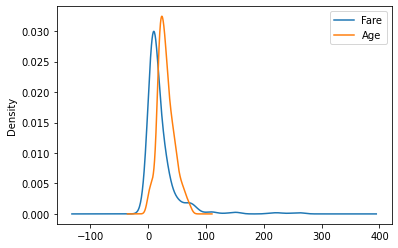

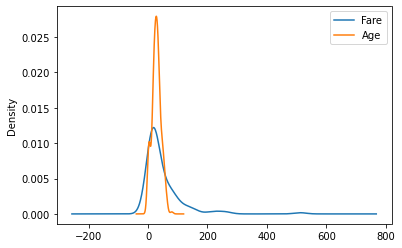

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
data.groupby(["Survived"])["Fare", "Age"].plot.kde()


**8. Як відрізняється середній вік чоловіків / жінок в залежності від класу обслуговування? Оберіть правильні твердження:**
- В середньому чоловіки 1-го класу старші 40 років ✅
- В середньому жінки 1-го класу старші 40 років
- Чоловіки всіх класів в середньому старші жінок того ж класу ✅
- В середньому люди в 1 класі старші, ніж в 2-му, а також старші представників 3-го класу ✅

In [51]:
data.groupby(["Pclass", "Sex"]) ["Age"].agg(['mean'])

mean
Pclass Sex          
1      female  34.61
       male    41.28
2      female  28.72
       male    30.74
3      female  21.75
       male    26.51